## Import & Setting

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import config
import os
import utils
import numpy as np
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RANSACRegressor

data = config.config()

## Functions

In [2]:
def cal_error_regression(depth_name_list, df_regression):
    reg_depth_error, reg_depth_error_rate, reg_depth_error_rate_avg, reg_depth = utils.melt_to_col(depth_name_list,
                                                                                                   df_regression)
    reg_depth_diff = utils.create_dataframe(reg_depth_error, depth_name_list)
    reg_depth_reg = utils.create_dataframe(reg_depth, depth_name_list)
    df_depth_reg_error_rate = utils.df_to_error_rate_list(reg_depth_reg)
    return reg_depth_diff, df_depth_reg_error_rate

In [3]:
def set_regression(depth_list, depth_name_list, degree=2):
    df_depth_reggresion = pd.DataFrame(depth_list, depth_name_list).T.melt().dropna(axis=0)
    df_feature, poly_leg = utils.poly_feature(df_depth_reggresion['value'].values.reshape(-1, 1), degree)
    lin_reg_2 = LinearRegression()
    # lin_reg_2 = Ridge()
    lin_reg_2.fit(df_feature, df_depth_reggresion['variable'].values)
    utils.write_coef(data.file_manager.save_path, np.array(lin_reg_2.coef_), degree)
    # lin_reg_2 = RANSACRegressor(random_state=0).fit(df_feature, df_depth_reggresion['variable'].values)
    predict_Y = lin_reg_2.predict(poly_leg.fit_transform(df_depth_reggresion['value'].values.reshape(-1, 1)))
    df_depth_reggresion['regression'] = lin_reg_2.predict(
        poly_leg.fit_transform(df_depth_reggresion['value'].values.reshape(-1, 1)))
    return df_depth_reggresion

In [4]:
def boxplot(df_diff, df_rate):
    df_mean = df_diff.T.mean()
    ax = df_diff.T.plot(kind='box')
    ax.plot(ax.get_xticks(), df_mean, color='orange', linewidth=0.5, marker='o', markersize=0.8)
    # for i in range(len(df_rate)):
    #     ax.text(ax.get_xticks()[i]-0.15, -1.5, "{}%".format(round(df_rate[i], 2)), fontsize=7.5, color='red')
    plt.xlabel('depth(m)')
    plt.ylabel('error(m)')
    plt.grid(True)
    plt.title('average error rate : {}%'.format(round(float(sum(df_rate) / len(df_rate)), 2)))
    plt.show()

## Set variable (Road)

In [5]:
category = 'road'

## Read gt_distance

In [6]:
if not utils.check_exist(data.file_manager.regression_data + os.path.join('/', category)):
    utils.make_folder(data.file_manager.regression_data + os.path.join('/', category))
data.file_manager.path_category_update(category)

gt_dist = data.distance.read_gt_distance(utils.read_folder_list(data.file_manager.img_path),
                                         data.file_manager.gt_distance_path)
folder_names = gt_dist.keys()
scale = data.file_manager.scale_num
degree = data.file_manager.degree_num

## Load depth list

In [7]:
depth_list, bottom_depth_list, depth_name_list, depth_diff, box_coord = utils.load_depth_list(
    data.file_manager.save_path,
    gt_dist, folder_names,
    scale)

## Plot - original

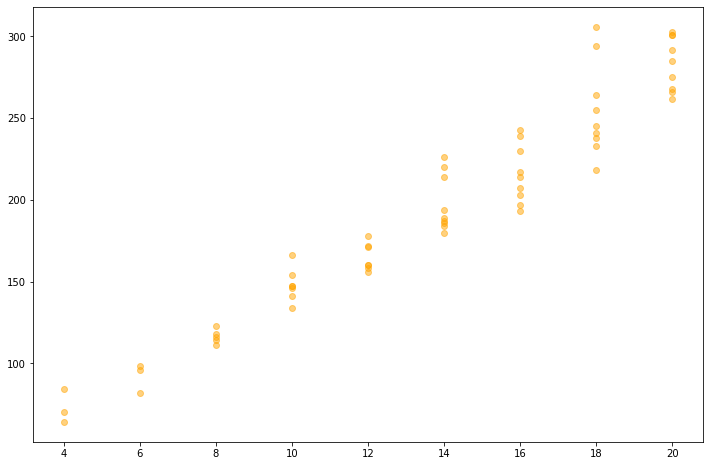

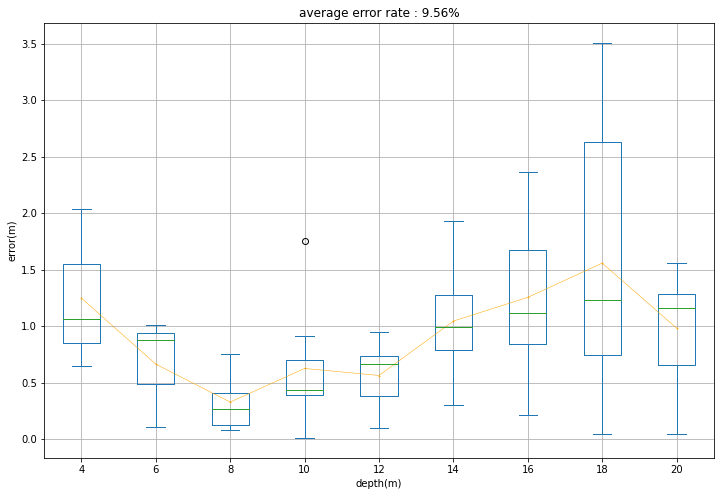

In [141]:
df_depth_regression = set_regression(depth_list, depth_name_list, degree=degree)
df_reg_diff_ori, df_error_rate_ori = cal_error_regression(depth_name_list, df_depth_regression)
plt.scatter(df_depth_regression['variable'].values, df_depth_regression['value'].values, c="orange", alpha=0.5)
boxplot(df_reg_diff_ori, df_error_rate_ori)
df_depth_regression.to_csv(
    data.file_manager.regression_data + os.path.join('/', category) +
    os.path.join('/', 'regression_original_{}.csv'.format(degree)))
plt.show()

## Plot - mode

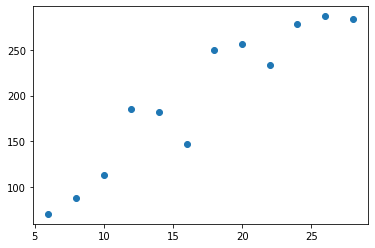

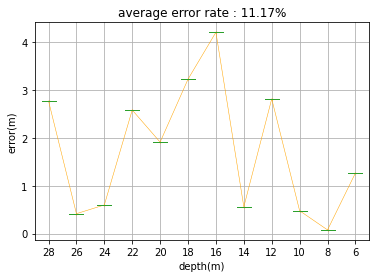

In [9]:
    df_depth_mode_list = utils.df_option_to_list(utils.create_dataframe(depth_list, depth_name_list))
    df_depth_mode_regression = set_regression(df_depth_mode_list, depth_name_list)
    df_reg_diff_mode, df_error_rate_mode = cal_error_regression(depth_name_list, df_depth_mode_regression)
    plt.scatter(df_depth_mode_regression['variable'].values, df_depth_mode_regression['value'].values)
    df_depth_mode_regression.to_csv(
        data.file_manager.regression_data + os.path.join('/', category) +
        os.path.join('/', 'regression_mode_{}.csv'.format(degree)))
    boxplot(df_reg_diff_mode, df_error_rate_mode)

## Plot - bottom line

In [140]:
    df_depth_bottom_list = utils.df_option_to_list(utils.create_dataframe(bottom_depth_list, depth_name_list))
    df_depth_bottom_regression = set_regression(bottom_depth_list, depth_name_list)
    df_reg_diff_mode, df_error_rate_mode = cal_error_regression(depth_name_list, df_depth_bottom_regression)
    plt.scatter(df_depth_bottom_regression['variable'].values, df_depth_bottom_regression['value'].values)
    df_depth_bottom_regression.to_csv(
        data.file_manager.regression_data + os.path.join('/', category) +
        os.path.join('/', 'regression_bottom_line_{}.csv'.format(degree)))
    boxplot(df_reg_diff_mode, df_error_rate_mode)

IndexError: index 0 is out of bounds for axis 0 with size 0

## Plot - options

In [139]:
    df_depth_mode_list = utils.df_option_to_list(utils.create_dataframe(bottom_depth_list, depth_name_list))
    df_depth_avg_list = utils.df_option_to_list(utils.create_dataframe(bottom_depth_list, depth_name_list), 'avg')
    df_depth_median_list = utils.df_option_to_list(utils.create_dataframe(bottom_depth_list, depth_name_list), 'median')
    df_depth_mode_regression = set_regression(df_depth_mode_list, depth_name_list, degree=degree)
    df_depth_avg_regression = set_regression(df_depth_avg_list, depth_name_list, degree=degree)
    df_depth_median_regression = set_regression(df_depth_median_list, depth_name_list, degree=degree)
    plt.scatter(df_depth_bottom_regression['variable'].values, df_depth_bottom_regression['value'].values, c="orange",
                alpha=0.5)
    plt.plot(df_depth_mode_regression['variable'].values, df_depth_mode_regression['value'].values, 'o',
             linestyle='dashed', linewidth=2, markersize=6, alpha=.8)
    plt.plot(df_depth_avg_regression['variable'].values, df_depth_avg_regression['value'].values, 'o',
             linestyle='dashed', linewidth=2, markersize=6, alpha=.8, c="red")
    plt.plot(df_depth_median_regression['variable'].values, df_depth_median_regression['value'].values, 'o',
             linestyle='dashed', linewidth=2, markersize=6, alpha=.8, c="green")
    plt.legend(['mode', 'avg', 'median'])
    plt.grid(True)
    plt.xticks(depth_name_list)
    plt.xlabel('depth(m)')
    plt.ylabel('value')
    plt.show()
    df_reg_diff_mode, df_error_rate_mode = cal_error_regression(depth_name_list, df_depth_mode_regression)
    df_reg_diff_avg, df_error_rate_avg = cal_error_regression(depth_name_list, df_depth_avg_regression)
    df_reg_diff_median, df_error_rate_median = cal_error_regression(depth_name_list, df_depth_median_regression)
    boxplot(df_reg_diff_mode, df_error_rate_mode)
    boxplot(df_reg_diff_avg, df_error_rate_avg)
    boxplot(df_reg_diff_median, df_error_rate_median)

IndexError: index 0 is out of bounds for axis 0 with size 0

*****

# Plot - *ground*

## Initialize *ground* configuration

In [622]:
data = config.config()

## Set variable (*ground*)

In [522]:
category = 'ground'
direction_e = 'east'
direction_w = 'west'
direction_n = 'north'
direction_s = 'south'

## *ground* path check

In [597]:
# East
data.file_manager.path_category_update(category, direction_e)
if not utils.check_exist(data.file_manager.regression_data + os.path.join('/', category) + os.path.join('/', direction_e)):
    utils.make_folder(data.file_manager.regression_data + os.path.join('/', category) + os.path.join('/', direction_e))

In [609]:
# West
data.file_manager.path_category_update(category, direction_w)
if not utils.check_exist(data.file_manager.regression_data + os.path.join('/', category) + os.path.join('/', direction_w)):
    utils.make_folder(data.file_manager.regression_data + os.path.join('/', category) + os.path.join('/', direction_w))

In [623]:
# North
data.file_manager.path_category_update(category, direction_n)
if not utils.check_exist(data.file_manager.regression_data + os.path.join('/', category) + os.path.join('/', direction_n)):
    utils.make_folder(data.file_manager.regression_data + os.path.join('/', category) + os.path.join('/', direction_n))

In [579]:
# South
data.file_manager.path_category_update(category, direction_s)
if not utils.check_exist(data.file_manager.regression_data + os.path.join('/', category) + os.path.join('/', direction_s)):
    utils.make_folder(data.file_manager.regression_data + os.path.join('/', category) + os.path.join('/', direction_s))

## Read *gt_distance*

In [624]:
gt_dist = data.distance.read_gt_distance(utils.read_folder_list(data.file_manager.img_path),
                                         data.file_manager.gt_distance_path)
gt_dist
folder_names = gt_dist.keys()
scale = data.file_manager.scale_num
degree = data.file_manager.degree_num
depth_list, bottom_depth_list, depth_name_list, depth_diff, box_coord = utils.load_depth_list(
    data.file_manager.save_path,
    gt_dist, folder_names,
    scale,
    ground=True)

0006
155 179 
330 180 
506 176 
0008
68 158 
195 158 
328 159 
462 157 
584 155 
0010
19 146 
116 147 
220 146 
326 146 
435 146 
537 144 
629 144 
0012
63 138 
147 138 
236 140 
326 137 
417 138 
503 137 
583 138 
0014
30 134 
96 134 
170 134 
246 134 
324 134 
403 133 
478 132 
549 132 
616 132 
0016
63 130 
122 131 
188 132 
257 131 
323 131 
393 130 
460 129 
524 129 
584 128 
0018
89 126 
143 126 
202 126 
262 126 
323 126 
384 126 
444 126 
503 126 
557 126 
0020
109 124 
160 124 
213 124 
269 125 
322 125 
378 125 
432 124 
485 124 
535 123 


## Plot - *ewns*

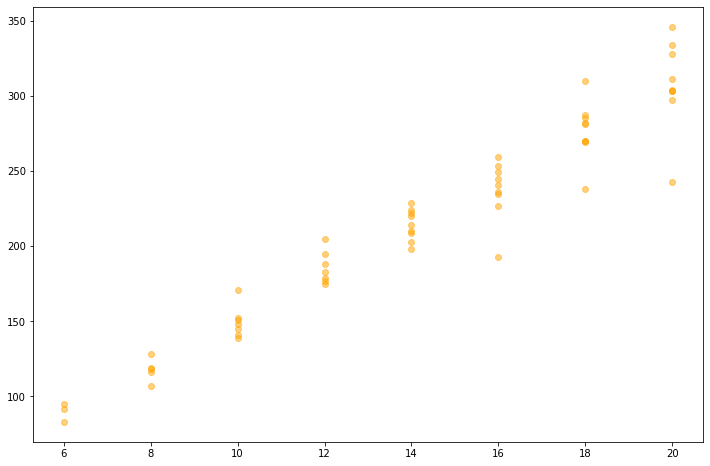

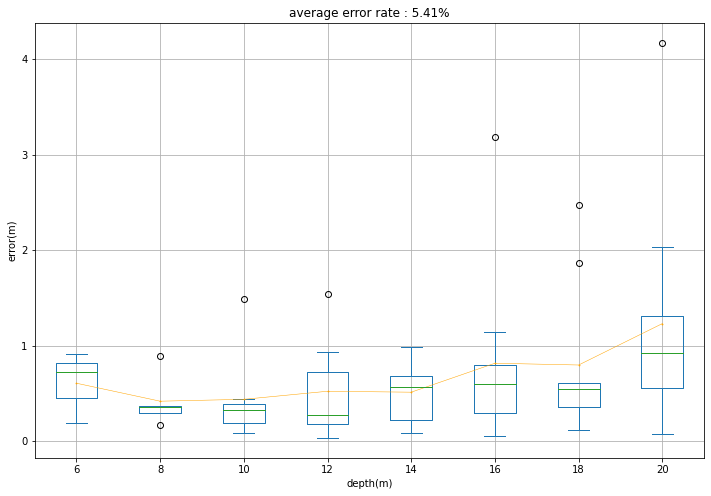

In [626]:
df_depth_regression = set_regression(depth_list, depth_name_list, degree=degree)
df_reg_diff_ori, df_error_rate_ori = cal_error_regression(depth_name_list, df_depth_regression)
plt.scatter(df_depth_regression['variable'].values, df_depth_regression['value'].values, c="orange", alpha=0.5)
boxplot(df_reg_diff_ori, df_error_rate_ori)
df_depth_regression.to_csv(
    data.file_manager.regression_data + os.path.join('/', category) +
    os.path.join('/', 'regression_original_{}.csv'.format(degree)))
plt.show()

## Plot - *east*

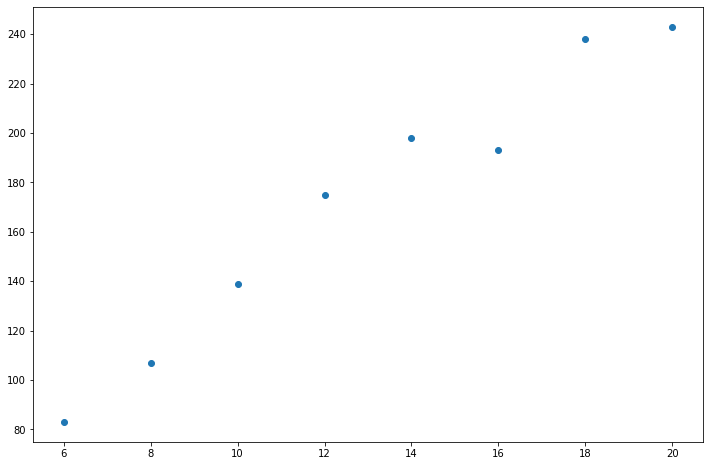

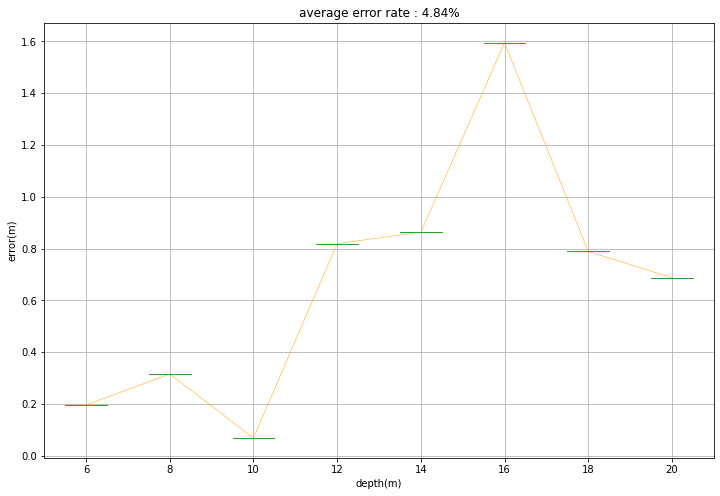

In [627]:
df_depth_mode_list = utils.df_option_to_list(utils.create_dataframe(depth_list, depth_name_list))
df_depth_mode_regression = set_regression(df_depth_mode_list, depth_name_list)
df_reg_diff_mode, df_error_rate_mode = cal_error_regression(depth_name_list, df_depth_mode_regression)
plt.scatter(df_depth_mode_regression['variable'].values, df_depth_mode_regression['value'].values)
df_depth_mode_regression.to_csv(
    data.file_manager.regression_data + os.path.join('/', category) +
    os.path.join('/', 'regression_mode_{}.csv'.format(degree)))
boxplot(df_reg_diff_mode, df_error_rate_mode)

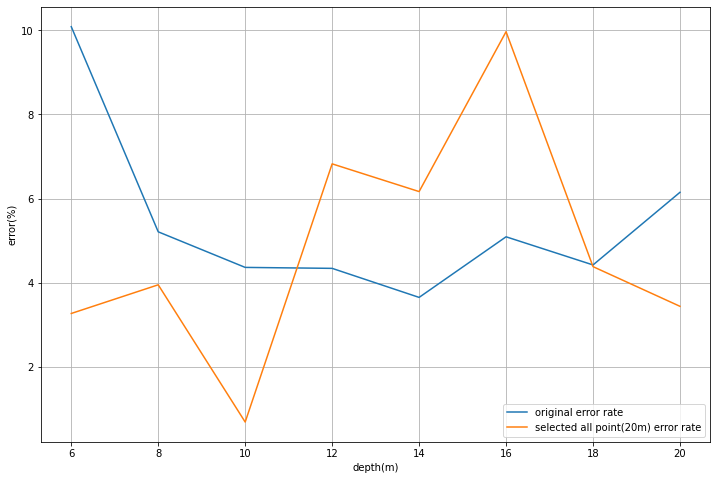

In [628]:
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(depth_name_list, df_error_rate_ori)
plt.plot(depth_name_list, df_error_rate_mode)
plt.legend(['original error rate', 'selected all point(20m) error rate'])
plt.xlabel('depth(m)')
plt.ylabel('error(%)')
plt.grid(True)

## Plot selected distance (0020) ->*20m*

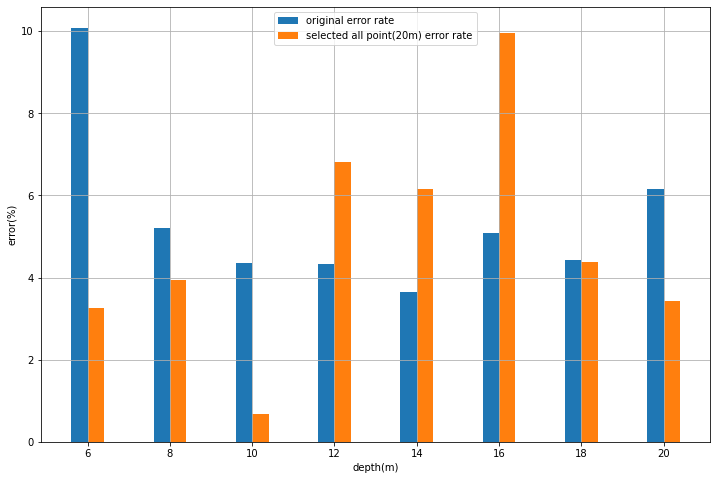

In [629]:
df_error_rate_mode
x = np.arange(8)
plt.bar(x-0.1, df_error_rate_ori, width=0.2)
plt.bar(x+0.1, df_error_rate_mode, alpha=1, width=0.2)
plt.xticks(x, depth_name_list)
plt.legend(['original error rate', 'selected all point(20m) error rate'])
plt.xlabel('depth(m)')
plt.ylabel('error(%)')
plt.grid(True)

In [630]:
folder_names_list = list(folder_names)
selected_dist = folder_names_list[-1] # 0020 -> 20m
data.file_manager.depth_file = utils.rand_img(data.file_manager.depth_path + os.path.join('/', selected_dist))
selected_dist_path = data.file_manager.depth_path + os.path.join('/', selected_dist, data.file_manager.depth_file)
selected_depth_list = utils.coord_to_depth(selected_dist_path, box_coord)

In [631]:
# df original depth
df_depth_regression = set_regression(depth_list, depth_name_list, degree=degree)
df_reg_diff_ori, df_error_rate_ori = cal_error_regression(depth_name_list, df_depth_regression)
# df selected depth
df_selected_depth_regression = set_regression(selected_depth_list, depth_name_list, degree=degree)
df_selected_reg_diff_ori, df_selected_error_rate_ori = cal_error_regression(depth_name_list, df_selected_depth_regression)

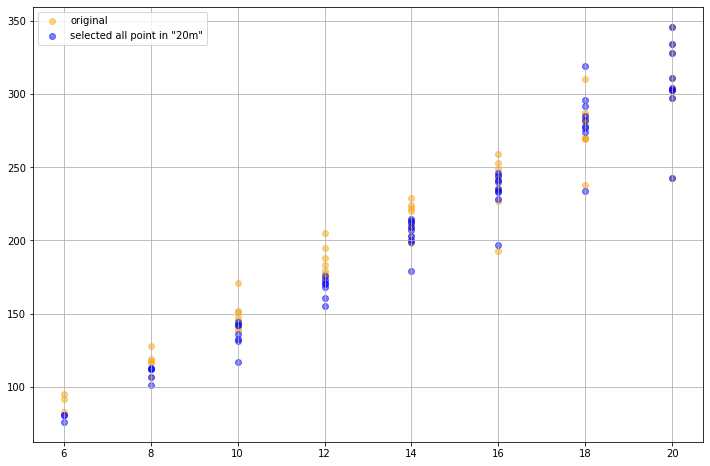

In [632]:
# plot two different data
plt.scatter(df_depth_regression['variable'].values, df_depth_regression['value'].values, c="orange", alpha=0.5)
plt.scatter(df_selected_depth_regression['variable'].values, df_selected_depth_regression['value'].values, c="blue", alpha=0.5)
plt.legend(['original', 'selected all point in "20m"'])
plt.grid(True)

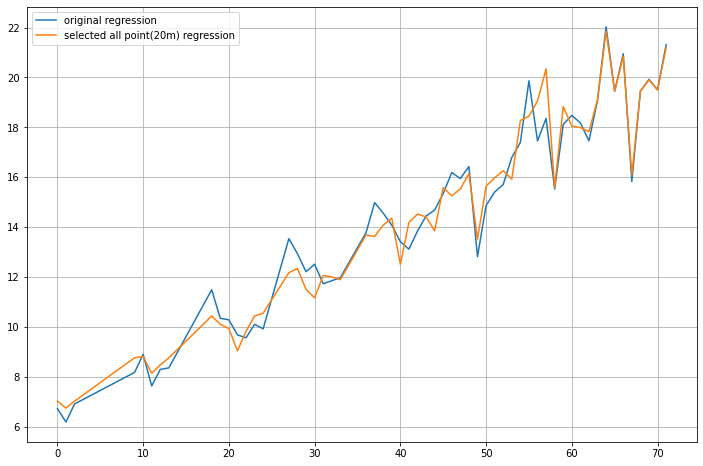

In [633]:
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(df_depth_regression['regression'])
plt.plot(df_selected_depth_regression['regression'])
plt.legend(['original regression', 'selected all point(20m) regression'])
plt.grid(True)

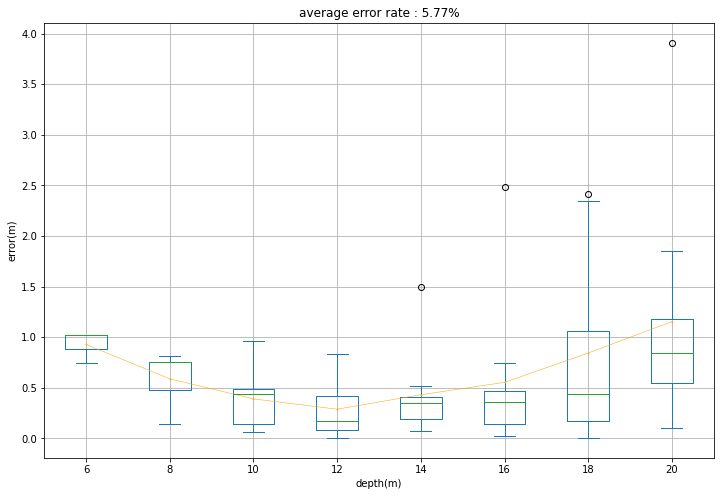

In [634]:
# Selected box plot
boxplot(df_selected_reg_diff_ori, df_selected_error_rate_ori)

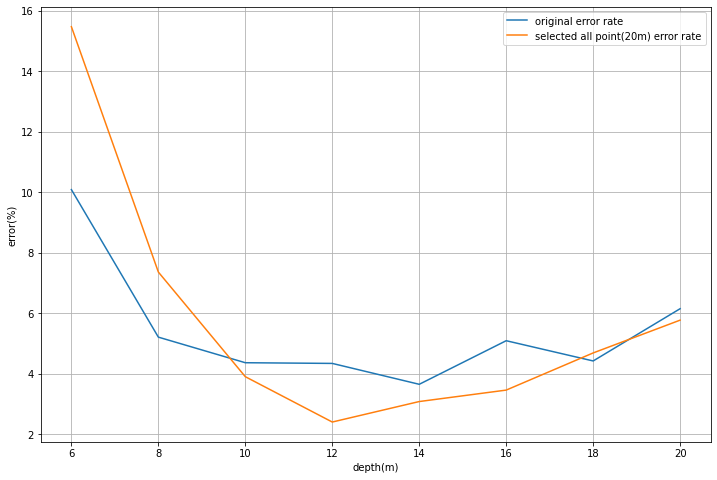

In [635]:
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(depth_name_list, df_error_rate_ori)
plt.plot(depth_name_list, df_selected_error_rate_ori)
plt.legend(['original error rate', 'selected all point(20m) error rate'])
plt.xlabel('depth(m)')
plt.ylabel('error(%)')
plt.grid(True)

---

## ewns analysis

In [589]:
df_s_value = df_depth_regression[['value']]
df_s_value.rename(columns={'value':'south'}, inplace=True)

c:\users\seok436\anaconda3\envs\real_meter\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [590]:
df_ewns = pd.DataFrame()
df_ewns['variable'] = df_depth_regression[['variable']]
df_ewns['east'] = df_e_value
df_ewns['west'] = df_w_value
df_ewns['north'] = df_n_value
df_ewns['south'] = df_s_value
df_ewns

,variable,east,west,north,south
0,6,96.0,97.0,92.0,83.0
1,6,82.0,85.0,83.0,87.0
2,6,98.0,94.0,95.0,89.0
9,8,114.0,117.0,116.0,122.0
10,8,116.0,127.0,128.0,111.0
11,8,111.0,112.0,107.0,114.0
12,8,118.0,127.1,118.0,116.0
13,8,123.0,114.0,119.0,116.1
18,10,147.0,149.0,171.0,142.0
19,10,146.0,142.0,152.0,144.0


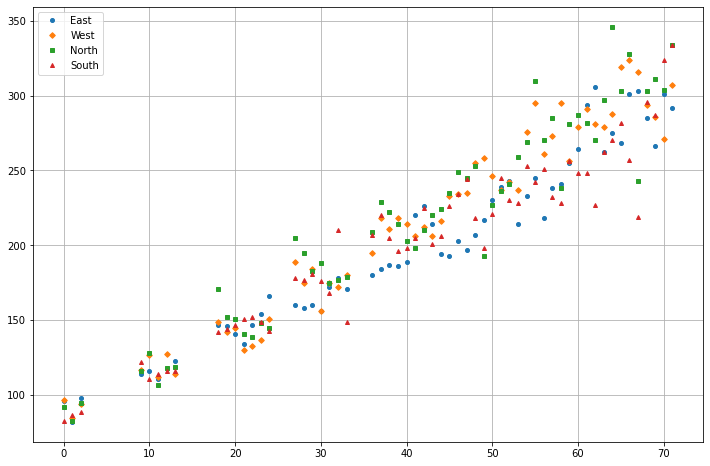

In [658]:
plt.plot(df_ewns['east'], alpha=1, marker='o', linestyle="", markersize=4, linewidth=0.5)
plt.plot(df_ewns['west'], alpha=1, marker='D', linestyle="", markersize=4, linewidth=0.5)
plt.plot(df_ewns['north'], alpha=1, marker='s', linestyle="", markersize=4, linewidth=0.5)
plt.plot(df_ewns['south'], alpha=1, marker='^', linestyle="", markersize=4, linewidth=0.5)
plt.grid(True)
plt.legend(['East', 'West', 'North', 'South'])

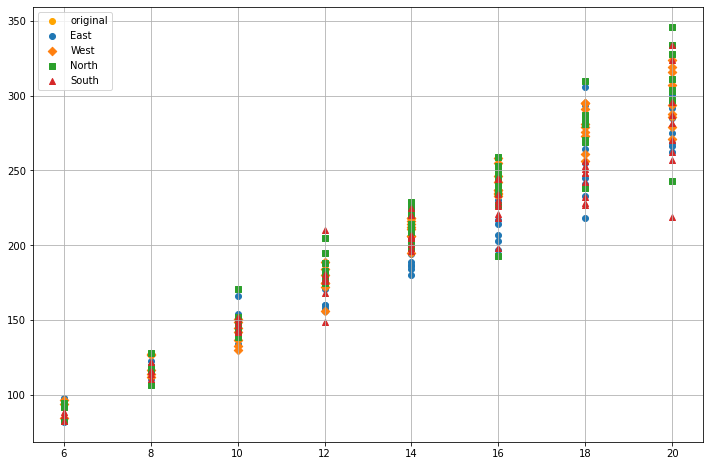

In [657]:
plt.scatter(df_depth_regression['variable'].values, df_depth_regression['value'].values, c="orange", alpha=1)
plt.scatter(df_depth_regression['variable'].values, df_ewns['east'], alpha=1, marker='o')
plt.scatter(df_depth_regression['variable'].values, df_ewns['west'], alpha=1, marker='D')
plt.scatter(df_depth_regression['variable'].values, df_ewns['north'], alpha=1, marker='s')
plt.scatter(df_depth_regression['variable'].values, df_ewns['south'].values, alpha=1, marker='^')
plt.grid(True)
plt.legend(['original', 'East', 'West', 'North', 'South'])

Text(0.5, 0, 'depth value')

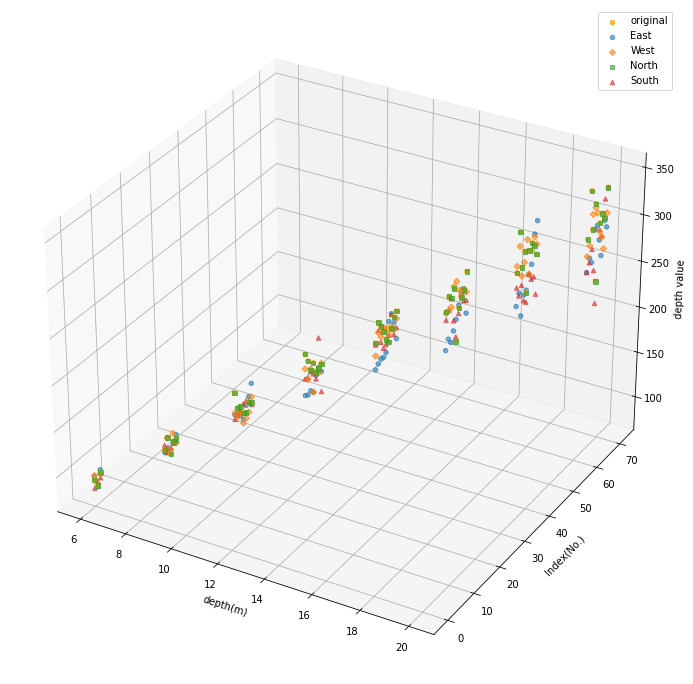

In [815]:
fig = plt.figure(figsize=(12,78))
ax = fig.add_subplot(projection='3d')
ax.scatter(df_depth_regression['variable'].values, df_depth_regression.index, df_depth_regression['value'].values, c="orange", alpha=0.8)
ax.scatter(df_depth_regression['variable'].values, df_depth_regression.index, df_ewns['east'], alpha=0.6, marker='o')
ax.scatter(df_depth_regression['variable'].values, df_depth_regression.index, df_ewns['west'], alpha=0.6, marker='D')
ax.scatter(df_depth_regression['variable'].values, df_depth_regression.index, df_ewns['north'], alpha=0.6, marker='s')
ax.scatter(df_depth_regression['variable'].values, df_depth_regression.index, df_ewns['south'].values, alpha=0.6, marker='^')
plt.grid(True)
plt.legend(['original', 'East', 'West', 'North', 'South'])
plt.xlabel('depth(m)')
plt.ylabel('Index(No.)')
ax.set_zlabel('depth value')

<AxesSubplot:>

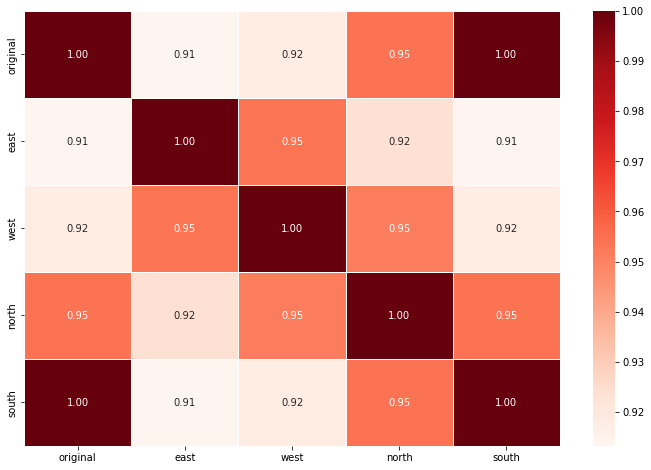

In [593]:
df_for_corr = df_ewns.iloc[:, [1,2,3,4]]
df_for_corr['original'] = df_depth_regression['value'].values
df_for_corr = df_for_corr[['original', 'east', 'west', 'north', 'south']]
depth_corr_data = df_for_corr.corr(method = 'pearson')
sns.heatmap(data = depth_corr_data, annot = True, fmt = '.2f', linewidths = .5, cmap = 'Reds')

In [637]:
df_twofive_regression = pd.DataFrame()

# avg depth at distance

In [762]:
selected_avg_depth_list = []
for i in selected_depth_list:
    selected_avg_depth_list.append(int(np.mean(i)))
    print(int(np.mean(i)))

79
109
135
167
204
233
281
307


[79, 109, 135, 167, 204, 233, 281]

In [740]:
df_selected_2_depth_regression = pd.DataFrame(selected_depth_list[:2], depth_name_list[:2]).T.melt().dropna(axis=0)
df_feature, poly_leg = utils.poly_feature(df_selected_2_depth_regression['value'].values.reshape(-1, 1), degree)
lin_reg_2 = LinearRegression()
df_selected_2_depth_regression

,variable,value
0,6,81.0
1,6,76.0
2,6,81.0
5,8,112.0
6,8,113.0
7,8,101.0
8,8,107.0
9,8,112.0


In [706]:
lin_reg_2.fit(df_feature, df_selected_2_depth_regression['variable'].values)
df_selected_depth_regression['regression_avg_point'] = lin_reg_2.predict(poly_leg.fit_transform(df_selected_depth_regression['value'].values.reshape(-1, 1)))

array([ 6.49720251,  6.19718878,  6.49720251,  8.3572876 ,  8.41729035,
        7.69725741,  8.05727388,  8.3572876 , 10.15736996,  9.79735348,
        9.61734525,  8.65730133,  9.49733976, 10.15736996, 10.27737545,
       12.01745505, 12.19746329, 11.29742211, 10.93740564, 11.89744956,
       11.83744682, 11.71744133, 13.63752917, 13.57752642, 14.05754838,
       14.35756211, 12.37747152, 14.17755387, 14.53757034, 14.41756485,
       13.8175374 , 15.6776225 , 15.31760603, 15.61761975, 16.27764995,
       13.45752093, 15.73762524, 16.09764171, 16.39765544, 16.03763897,
       18.55775426, 18.73776249, 19.39779269, 20.77785582, 15.6776225 ,
       19.15778171, 18.31774328, 18.25774053, 18.0777323 , 19.45779543,
       22.39792994, 19.8178119 , 21.31788053, 16.2176472 , 19.8178119 ,
       20.29783386, 19.87781465, 21.677897  ])

In [701]:
df_selected_2_depth_regression = pd.DataFrame(selected_avg_depth_list[:], depth_name_list[:]).T.melt().dropna(axis=0)
df_feature, poly_leg = utils.poly_feature(df_selected_2_depth_regression['value'].values.reshape(-1, 1), degree)
lin_reg_2 = LinearRegression()

,variable,value
0,6,79
1,8,109
2,10,135
3,12,167
4,14,204
5,16,233
6,18,281
7,20,307


In [659]:
selected_depth_list

[[81, 76, 81],
 [112, 113, 101, 107, 112],
 [142, 136, 133, 117, 131, 142, 144],
 [173, 176, 161, 155, 171, 170, 168],
 [200, 199, 207, 212, 179, 209, 215, 213, 203],
 [234, 228, 233, 244, 197, 235, 241, 246, 240],
 [282, 285, 296, 319, 234, 292, 278, 277, 274],
 [297, 346, 303, 328, 243, 303, 311, 304, 334]]

In [752]:
for n in range(1, 8):
    if n == 1:
        temp_regression = pd.DataFrame(selected_avg_depth_list[:], depth_name_list[:]).T.melt().dropna(axis=0)
    else:
        temp_regression = pd.DataFrame(selected_avg_depth_list[:n], depth_name_list[:n]).T.melt().dropna(axis=0)
    df_feature, poly_leg = utils.poly_feature(temp_regression['value'].values.reshape(-1, 1), degree)
    lin_reg_2 = LinearRegression()
    lin_reg_2.fit(df_feature, temp_regression['variable'].values)
    predict_Y = lin_reg_2.predict(poly_leg.fit_transform(df_selected_depth_regression['value'].values.reshape(-1, 1)))
    df_selected_depth_regression['regression_{}_point'.format(n)] = lin_reg_2.predict(
    poly_leg.fit_transform(df_selected_depth_regression['value'].values.reshape(-1, 1)))
df_selected_depth_regression

,variable,value,regression,regression_2_point,regression_3_point,regression_4_point,regression_5_point,regression_avg_point,regression_1_point,regression_6_point,regression_7_point,regression_8_point,regression_9_point
0,6,81.0,7.021407,6.133333,6.098472,6.142009,6.261885,6.497203,6.497203,6.277963,6.482229,6.497203,6.497203
1,6,76.0,6.741515,5.800000,5.741935,5.797673,5.938518,6.197189,6.197189,5.956736,6.180947,6.197189,6.197189
2,6,81.0,7.021407,6.133333,6.098472,6.142009,6.261885,6.497203,6.497203,6.277963,6.482229,6.497203,6.497203
9,8,112.0,8.756734,8.200000,8.308998,8.276894,8.266756,8.357288,8.357288,8.269571,8.350180,8.357288,8.357288
10,8,113.0,8.812712,8.266667,8.380306,8.345761,8.331430,8.417290,8.417290,8.333816,8.410436,8.417290,8.417290
11,8,101.0,8.140973,7.466667,7.524618,7.519354,7.555350,7.697257,7.697257,7.562871,7.687358,7.697257,7.697257
12,8,107.0,8.476842,7.866667,7.952462,7.932558,7.943390,8.057274,8.057274,7.948344,8.048897,8.057274,8.057274
13,8,112.0,8.756734,8.200000,8.308998,8.276894,8.266756,8.357288,8.357288,8.269571,8.350180,8.357288,8.357288
18,10,142.0,10.436083,10.200000,10.448217,10.342911,10.206954,10.157370,10.157370,10.196933,10.157874,10.157370,10.157370
19,10,136.0,10.100213,9.800000,10.020374,9.929708,9.818915,9.797353,9.797353,9.811460,9.796335,9.797353,9.797353


c:\users\seok436\anaconda3\envs\real_meter\lib\site-packages\numpy\core\_methods.py:163: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)


array([40.5, 38. , 40.5, 56. , 56.5, 50.5, 53.5, 56. ])

In [675]:
lin_reg_2.fit(df_feature, df_selected_2_depth_regression['variable'].values)
lin_reg_2.coef_
lin_reg_2.intercept_
#df_selected_2_depth_regression['variable'].values

1.094339622641507

In [678]:
predict_Y = lin_reg_2.predict(poly_leg.fit_transform(df_selected_depth_regression['value'].values.reshape(-1, 1)))
predict_Y

array([ 6.18867925,  5.87421384,  6.18867925,  8.13836478,  8.20125786,
        7.44654088,  7.82389937,  8.13836478, 10.02515723,  9.64779874,
        9.4591195 ,  8.45283019,  9.33333333, 10.02515723, 10.1509434 ,
       11.97484277, 12.16352201, 11.22012579, 10.8427673 , 11.8490566 ,
       11.78616352, 11.66037736, 13.67295597, 13.61006289, 14.11320755,
       14.42767296, 12.35220126, 14.23899371, 14.6163522 , 14.49056604,
       13.86163522, 15.81132075, 15.43396226, 15.74842767, 16.44025157,
       13.48427673, 15.87421384, 16.25157233, 16.56603774, 16.18867925,
       18.83018868, 19.01886792, 19.71069182, 21.1572327 , 15.81132075,
       19.4591195 , 18.57861635, 18.51572327, 18.32704403, 19.77358491,
       22.85534591, 20.1509434 , 21.72327044, 16.37735849, 20.1509434 ,
       20.65408805, 20.21383648, 22.10062893])

In [411]:
df_selected_depth_regression['regression_2_point'] = lin_reg_2.predict(
    poly_leg.fit_transform(df_selected_depth_regression['value'].values.reshape(-1, 1)))

In [742]:
df_twofive_regression = df_selected_depth_regression

Text(0, 0.5, 'Value')

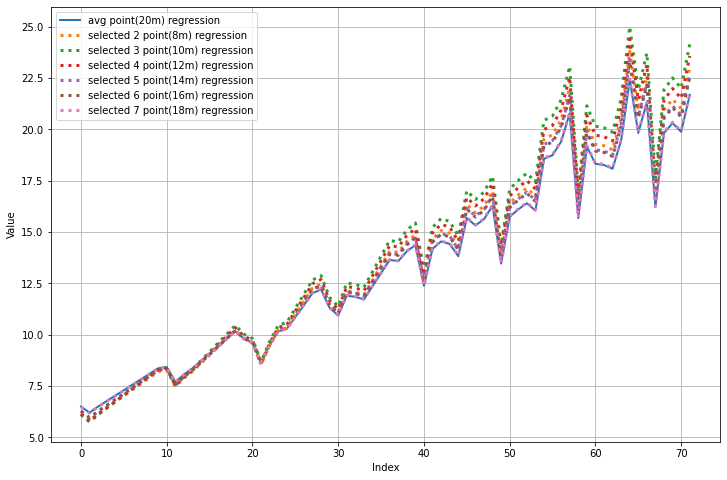

In [817]:
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(df_selected_depth_regression['regression_avg_point'], linewidth=2)
plt.plot(df_selected_depth_regression['regression_2_point'], linestyle=":", linewidth=3)
plt.plot(df_selected_depth_regression['regression_3_point'], linestyle=":", linewidth=3)
plt.plot(df_selected_depth_regression['regression_4_point'], linestyle=":", linewidth=3)
plt.plot(df_selected_depth_regression['regression_5_point'], linestyle=":", linewidth=3)
plt.plot(df_selected_depth_regression['regression_6_point'], linestyle=":", linewidth=3)
plt.plot(df_selected_depth_regression['regression_7_point'], linestyle=":", linewidth=3)
plt.legend(['avg point(20m) regression', 'selected 2 point(8m) regression', 'selected 3 point(10m) regression', 
            'selected 4 point(12m) regression', 'selected 5 point(14m) regression',
           'selected 6 point(16m) regression', 'selected 7 point(18m) regression'])
plt.grid(True)
plt.xlabel('Index')
plt.ylabel('Value')

In [768]:
# Divided dataframe 2 spot point to 5 spot point
df_error_original = df_selected_depth_regression[['variable', 'value', 'regression']]
df_error_2_point = df_selected_depth_regression[['variable', 'value', 'regression_2_point']]
df_error_3_point = df_selected_depth_regression[['variable', 'value', 'regression_3_point']]
df_error_4_point = df_selected_depth_regression[['variable', 'value', 'regression_4_point']]
df_error_5_point = df_selected_depth_regression[['variable', 'value', 'regression_5_point']]
df_error_6_point = df_selected_depth_regression[['variable', 'value', 'regression_6_point']]
df_error_7_point = df_selected_depth_regression[['variable', 'value', 'regression_7_point']]
df_error_avg_point = df_selected_depth_regression[['variable', 'value', 'regression_avg_point']]

In [769]:
# Rename for calculating error
df_error_2_point.rename(columns={'regression_2_point':'regression'}, inplace=True)
df_error_3_point.rename(columns={'regression_3_point':'regression'}, inplace=True)
df_error_4_point.rename(columns={'regression_4_point':'regression'}, inplace=True)
df_error_5_point.rename(columns={'regression_5_point':'regression'}, inplace=True)
df_error_6_point.rename(columns={'regression_6_point':'regression'}, inplace=True)
df_error_7_point.rename(columns={'regression_7_point':'regression'}, inplace=True)
df_error_avg_point.rename(columns={'regression_avg_point':'regression'}, inplace=True)

c:\users\seok436\anaconda3\envs\real_meter\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [770]:
#Original
df_selected_reg_diff_ori, df_selected_error_rate_ori = cal_error_regression(depth_name_list, df_error_original)

In [771]:
df_selected_2_point_reg_diff, df_selected_2_point_error_rate = cal_error_regression(depth_name_list, df_error_2_point)
df_selected_3_point_reg_diff, df_selected_3_point_error_rate = cal_error_regression(depth_name_list, df_error_3_point)
df_selected_4_point_reg_diff, df_selected_4_point_error_rate = cal_error_regression(depth_name_list, df_error_4_point)
df_selected_5_point_reg_diff, df_selected_5_point_error_rate = cal_error_regression(depth_name_list, df_error_5_point)
df_selected_6_point_reg_diff, df_selected_6_point_error_rate = cal_error_regression(depth_name_list, df_error_6_point)
df_selected_7_point_reg_diff, df_selected_7_point_error_rate = cal_error_regression(depth_name_list, df_error_7_point)
df_selected_avg_point_reg_diff, df_selected_avg_point_error_rate = cal_error_regression(depth_name_list, df_error_avg_point)

In [715]:
np.mean(df_selected_avg_point_error_rate)

4.524828709216015

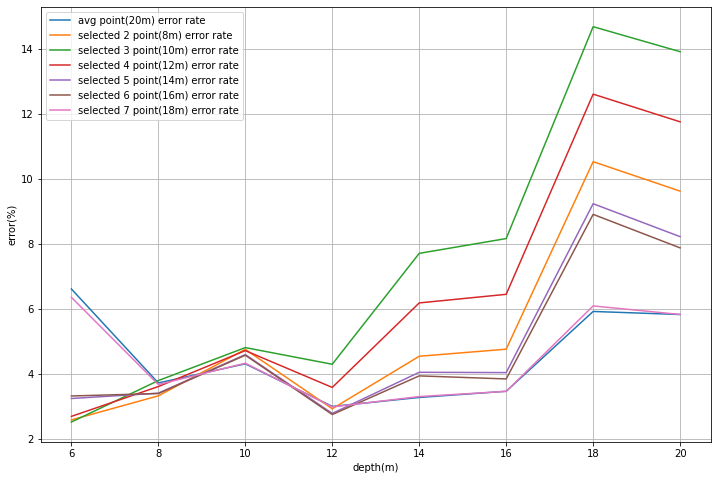

In [772]:
plt.plot(depth_name_list, df_selected_avg_point_error_rate)
plt.plot(depth_name_list, df_selected_2_point_error_rate)
plt.plot(depth_name_list, df_selected_3_point_error_rate)
plt.plot(depth_name_list, df_selected_4_point_error_rate)
plt.plot(depth_name_list, df_selected_5_point_error_rate)
plt.plot(depth_name_list, df_selected_6_point_error_rate)
plt.plot(depth_name_list, df_selected_7_point_error_rate)
plt.legend(['avg point(20m) error rate', 
            'selected 2 point(8m) error rate', 'selected 3 point(10m) error rate', 
            'selected 4 point(12m) error rate', 'selected 5 point(14m) error rate',
           'selected 6 point(16m) error rate', 'selected 7 point(18m) error rate'])
plt.xlabel('depth(m)')
plt.ylabel('error(%)')
plt.grid(True)

---